In [2]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2 MB 1.0 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=1e5b1c70c46449e792ab3df94e6748272e15eef90176288bb92a9b968cee0803
  Stored in directory: /Users/hosung/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import pandas as pd
from fbprophet import Prophet


In [27]:
df = pd.read_csv("./data/avocado.csv")

In [28]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [30]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [31]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]
df['Date'] = pd.to_datetime(df['Date'])
data = df[['Date', 'AveragePrice']].reset_index(drop=True)
data = data.rename(columns = {'Date':'ds', 'AveragePrice':'y'})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


In [34]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
364,2018-10-07,1.210737,1.307728,1.538317,1.184724,1.232507,0.215842,0.215842,0.215842,0.215842,0.215842,0.215842,0.0,0.0,0.0,1.426579
365,2018-10-08,1.210678,1.302836,1.533280,1.184494,1.232636,0.215442,0.215442,0.215442,0.215442,0.215442,0.215442,0.0,0.0,0.0,1.426120
366,2018-10-09,1.210620,1.309528,1.531290,1.184274,1.232761,0.214437,0.214437,0.214437,0.214437,0.214437,0.214437,0.0,0.0,0.0,1.425057
367,2018-10-10,1.210561,1.309766,1.539770,1.183985,1.232930,0.212843,0.212843,0.212843,0.212843,0.212843,0.212843,0.0,0.0,0.0,1.423404
368,2018-10-11,1.210503,1.302440,1.538659,1.183718,1.233072,0.210681,0.210681,0.210681,0.210681,0.210681,0.210681,0.0,0.0,0.0,1.421184


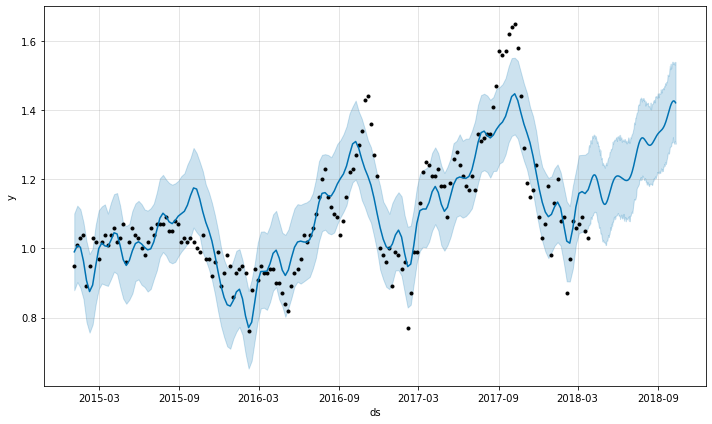

In [37]:
#미래 예측 2018/05 이후
fig1 = model.plot(forecast)
#검은색 점 = 아보카도 가격

<AxesSubplot:xlabel='ds'>

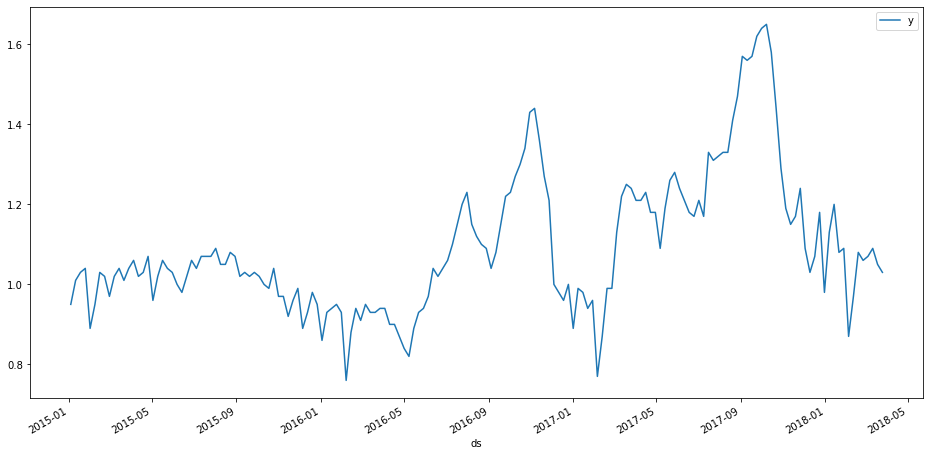

In [36]:
data.plot(x = 'ds', y = 'y', figsize=(16,8))

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style = 'darkgrid', palette = "bright", font_scale = 1.5)

In [38]:
df = pd.read_csv('./data/StudentsPerformance.csv')

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


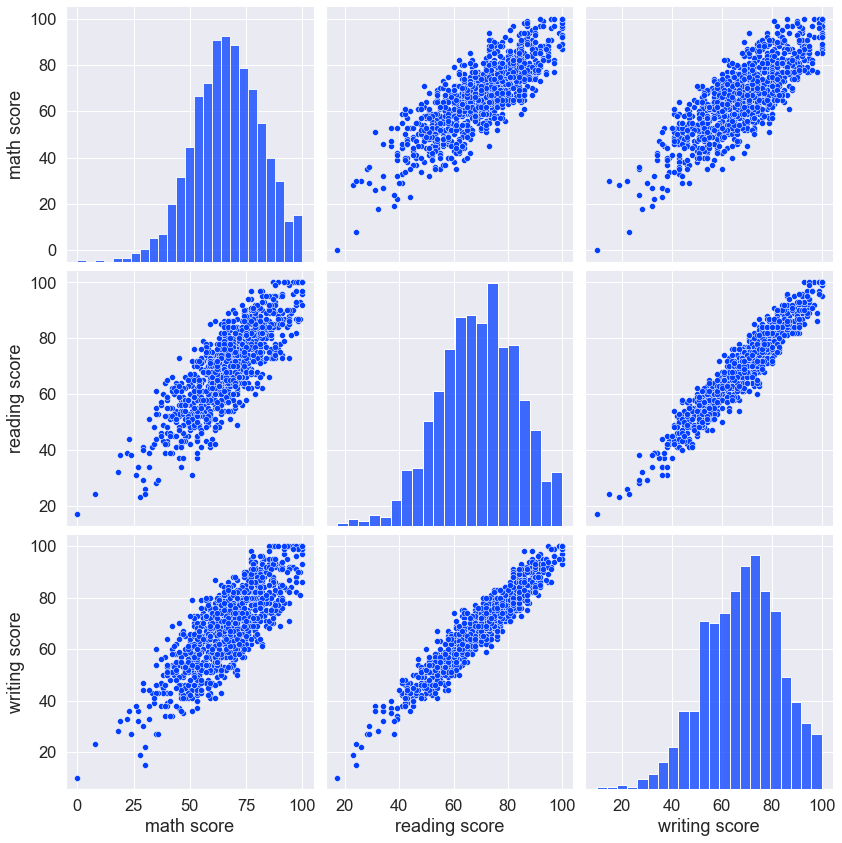

In [45]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], height = 4)

In [49]:
def average_score(dt):
    return (dt['math score'] + dt['reading score'] + dt['writing score']) / 3
df['average score'] = df.apply(average_score, axis = 1)

Text(0.5, 1.0, 'math')

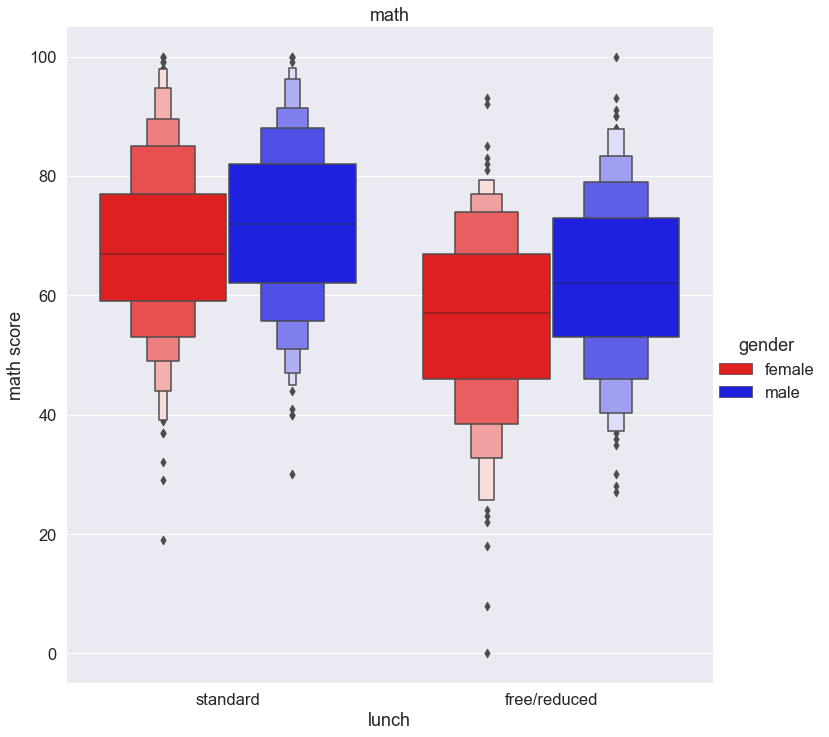

In [52]:
sns.catplot(x='lunch', y = 'math score', hue = 'gender', kind = 'boxen',
           data=df, height=10, palette=sns.color_palette(['red','blue']))
plt.title('math')

Text(0.5, 1.0, 'reading')

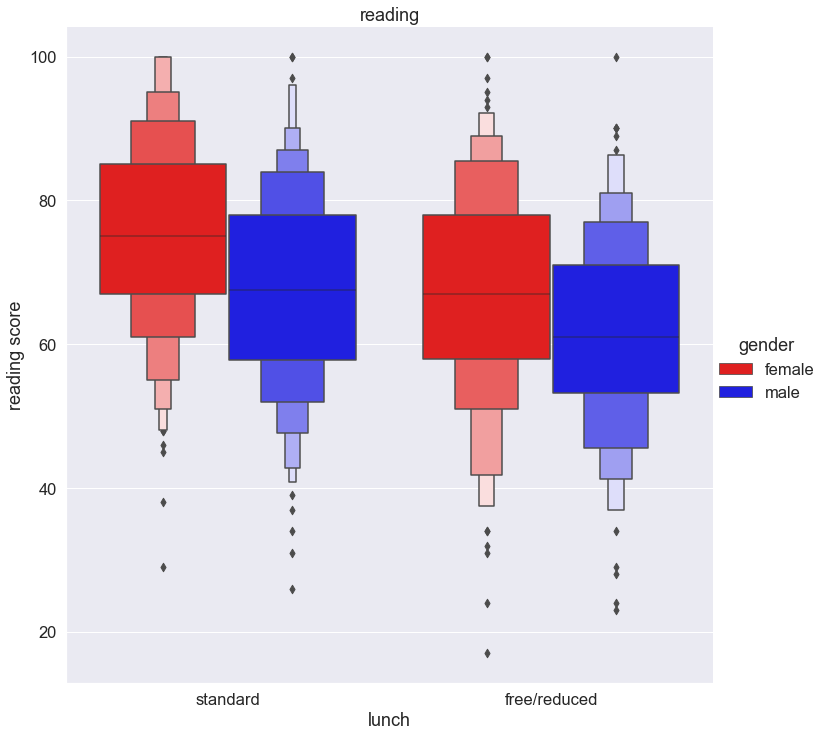

In [51]:
sns.catplot(x='lunch', y = 'reading score', hue = 'gender', kind = 'boxen',
           data=df, height=10, palette=sns.color_palette(['red','blue']))
plt.title('reading')

Text(0.5, 1.0, 'average score')

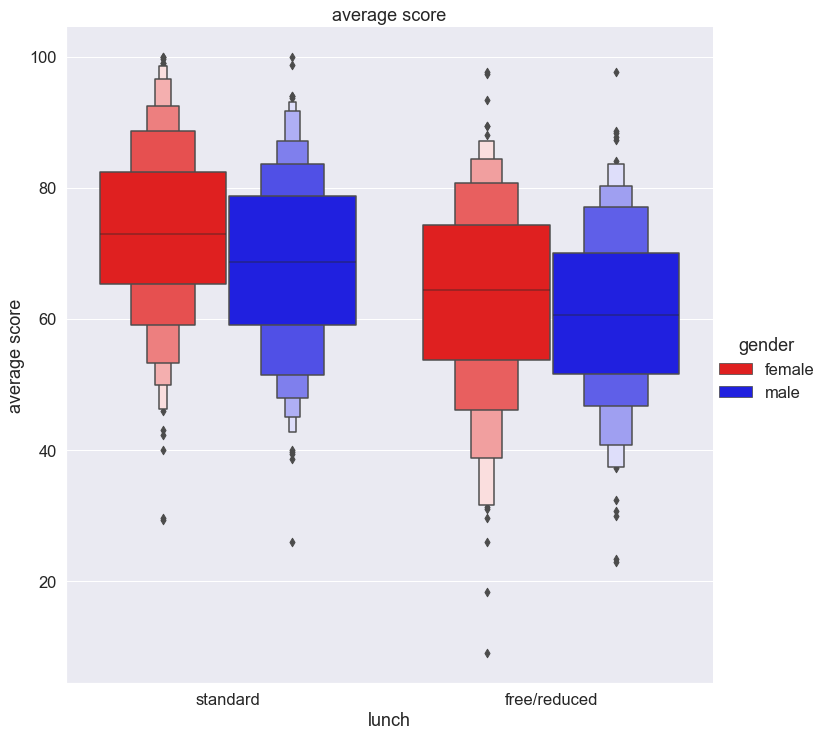

In [53]:
sns.catplot(x='lunch', y = 'average score', hue = 'gender', kind = 'boxen',
           data=df, height=10, palette=sns.color_palette(['red','blue']))
plt.title('average score')

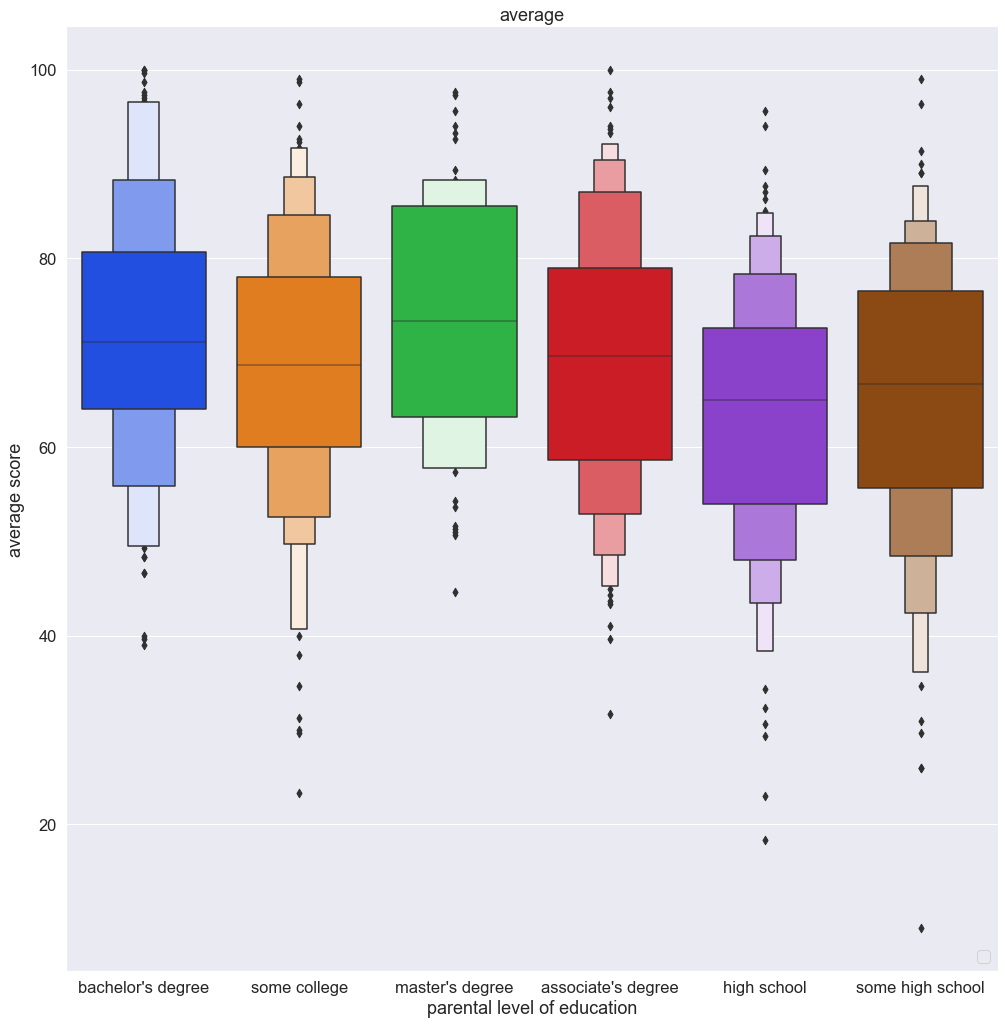

In [54]:
sns.catplot(x='parental level of education', y = 'average score',
           kind = 'boxen', data = df, height=14)
plt.title('average')
plt.legend(loc='lower right')

In [124]:
df = pd.read_csv('./data/StudentsPerformance.csv')

In [125]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [144]:
def average_score(dt):
    return (dt['math score'] + dt['reading score'] + dt['writing score']) / 3

In [145]:
df['average score'] = df.apply(average_score, axis = 1)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
# encoder = LabelEncoder()
# encoder.fit(df['parental level of education'])
# labels = encoder.transform(df['parental level of education'])
# labels = labels.reshape(-1,1)

In [148]:
# df.drop(['gender', 'race/ethnicity'],axis = 1, inplace = True)

### 원-핫 인코딩을 적용

In [149]:
df = pd.get_dummies(df)

### Data split

In [150]:
X_data = df.drop(['average score'],axis = 1)
y_target = df['average score']

In [151]:
X_train, X_test , y_train, y_test = train_test_split(X_data, y_target,
                                                     test_size=0.2, random_state = 345)

### Modeling

In [132]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [133]:
print('MSE:{0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)))

MSE: 0.000, RMSE :  0.000
Variance score :  1.000


In [163]:
#라쏘(Lasso) 회귀
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                            y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
            
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [153]:
alphas = [0.07, 0.1, 0.5, 1, 3]

#### lasso

In [134]:
from sklearn.linear_model import Lasso

In [164]:
coeff_lasso_df = get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data,
                                    y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.005 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.007 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.035 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.071 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.213 


#### Ridge

In [135]:
from sklearn.linear_model import Ridge

#### ElasticNet

In [136]:
from sklearn.linear_model import ElasticNet